In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import numpy as np

In [2]:
data = pd.read_csv('../data/gdl-19800101-20230623.csv')


In [3]:
data['datetime']= pd.to_datetime(data['datetime'])
data['day_year'] = data['datetime'].dt.dayofyear
data['year'] = data.datetime.dt.year
data.set_index('datetime',inplace=True)
data['rolltemp'] = data.temp.rolling(7).mean()
data.reset_index(inplace=True)
mean = data[data.year < 2020][['day_year','rolltemp']].groupby('day_year').mean().rename(columns={'rolltemp':'mean_temp'})
data = data.merge(mean, right_index=True, left_on='day_year')
data['temp_dif'] = data.rolltemp - data.mean_temp

In [4]:
data[['datetime', 'day_year', 'temp', 'rolltemp', 'mean_temp', 'temp_dif']].sort_values('datetime').tail()

,datetime,day_year,temp,rolltemp,mean_temp,temp_dif
15875,2023-06-19,170,26.8,26.857143,22.879643,3.977500
15876,2023-06-20,171,26.3,26.585714,22.732143,3.853571
15877,2023-06-21,172,26.5,26.442857,22.650000,3.792857
15878,2023-06-22,173,26.8,26.357143,22.572143,3.785000
15879,2023-06-23,174,27.4,26.457143,22.430357,4.026786


In [5]:
cmap = matplotlib.colormaps['Greys']
norm = mcolors.Normalize(vmin=0, vmax=1)
colors = [mcolors.to_hex(cmap(norm(x))) for x in np.linspace(0, 1, 45)]
len(colors)

45

/var/folders/74/bd6kyxhj1_ldp_sgvfdm9w640000gn/T/ipykernel_27914/3579129871.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tick_labels)


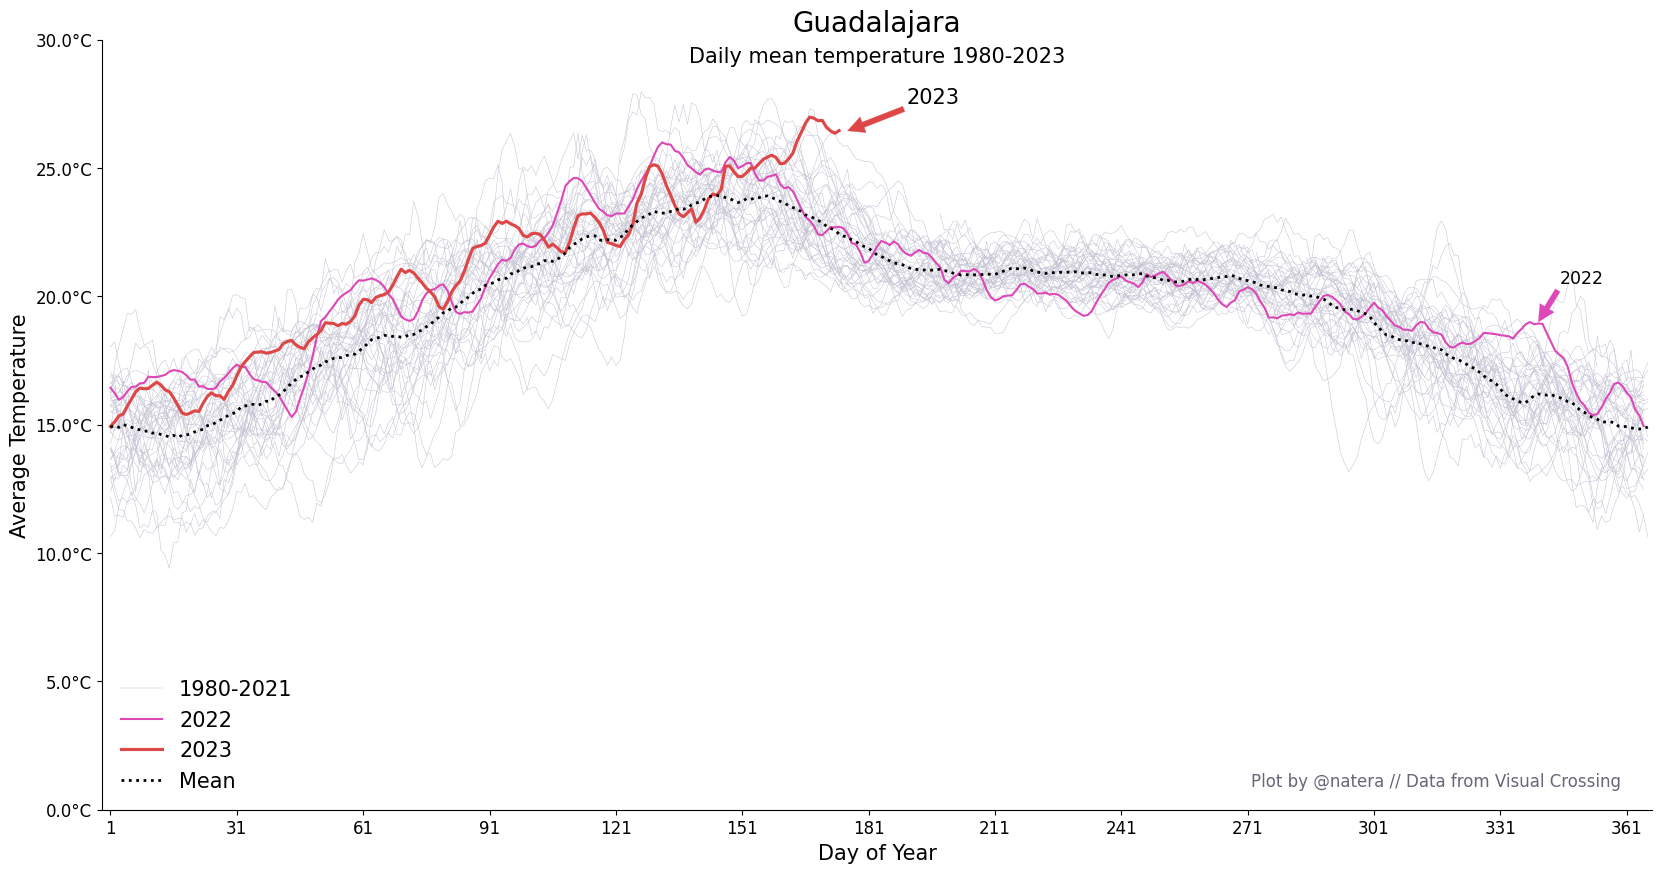

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
label = '1980-2021'
for year, color in zip(range(1980,2024), colors):
    title = data.name.unique()[0]
    temperature = 'rolltemp'
    color = '#c1c0d1'
    df = data[['datetime', 'day_year', 'year', temperature]][data.year == year]
    linewidth=0.35
    if year == 2023:
        color = '#de4747'
        linewidth = 2.25
        label = '2023'
    if year == 2022:
        color = '#de47b8'
        linewidth = 1.5
        label = '2022'
    ax.plot(df.day_year, df[temperature], color=color, linewidth=linewidth, label=label)
    label = None
ax.plot(data.day_year, data.mean_temp, color='black', linewidth=2,linestyle=':', label='Mean')
ax.annotate('2023', xy=(176, 26.45), xytext=(190, 27.5),arrowprops=dict(facecolor='#de4747', edgecolor='#de4747', linewidth=0.25), fontsize=15)
ax.annotate('2022', xy=(340, 19), xytext=(345, 20.5),arrowprops=dict(facecolor='#de47b8', edgecolor='#de47b8', linewidth=0.15), fontsize=12.5)
ax.set_xlim(-1, 367)
ax.set_ylim(0, 30)
ax.set_xticks(np.arange(1, 367, 30))
y_tick_labels = [f"{label}°C" for label in ax.get_yticks()]
ax.set_yticklabels(y_tick_labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel("Day of Year", fontsize=15)
ax.set_ylabel("Average Temperature", fontsize=15)
ax.set_title(title, fontsize=20, loc='center')
ax.legend(loc=3, fontsize=15, frameon=False)
ax.text(0.5, 0.97, "Daily mean temperature 1980-2023", fontsize=15, transform=ax.transAxes, ha='center')
text = "Plot by @natera // Data from Visual Crossing"
ax.text(0.98, 0.03, text, fontsize=12, color='#686778', transform=ax.transAxes, ha='right')
plt.savefig(f'../outputs/{title}.png', dpi=300, bbox_inches='tight');